In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
df = pd.read_csv("data/BA_reviews.csv")

In [3]:
df.head(10)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Check in and security at T5 ...
1,1,Not Verified | LHR T5 BA Gold Wing worked wel...
2,2,Not Verified | Very good service on this rout...
3,3,✅ Trip Verified | Flight mainly let down by ...
4,4,✅ Trip Verified | Another awful experience b...
5,5,"✅ Trip Verified | The service was rude, full..."
6,6,✅ Trip Verified | This flight was a joke. Th...
7,7,✅ Trip Verified | This time British Airways ...
8,8,"✅ Trip Verified | The seats were excellent, ..."
9,9,✅ Trip Verified | After the nightmare of get...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df = df.drop(columns=["Unnamed: 0"])

In [6]:
df['reviews'] = df['reviews'].str.strip()
df = df.drop_duplicates(subset='reviews')
df['reviews'] = df['reviews'].str.lower()

In [7]:
df['trip_verification'] = df['reviews'].str.contains('✅ trip verified', na=False).astype(int)

In [8]:
df.head()

,reviews,trip_verification
0,✅ trip verified | check in and security at t5 ...,1
1,not verified | lhr t5 ba gold wing worked wel...,0
2,not verified | very good service on this rout...,0
3,✅ trip verified | flight mainly let down by ...,1
4,✅ trip verified | another awful experience b...,1


In [9]:
df['reviews_cleaned'] = df['reviews'].apply(lambda x: x.split('|')[1].strip() if '|' in x else x)
df['reviews_cleaned'] = df['reviews_cleaned'].str.strip().str.replace(r'\s+', ' ', regex=True)
df = df.drop(columns=["reviews"])
df = df.rename(columns={'reviews_cleaned': 'reviews'})

In [10]:
df.head()

,trip_verification,reviews
0,1,check in and security at t5 quick. both galler...
1,0,lhr t5 ba gold wing worked well. pleasant chec...
2,0,very good service on this route ba2710 30th ma...
3,1,flight mainly let down by a disagreeable fligh...
4,1,another awful experience by british airways. t...


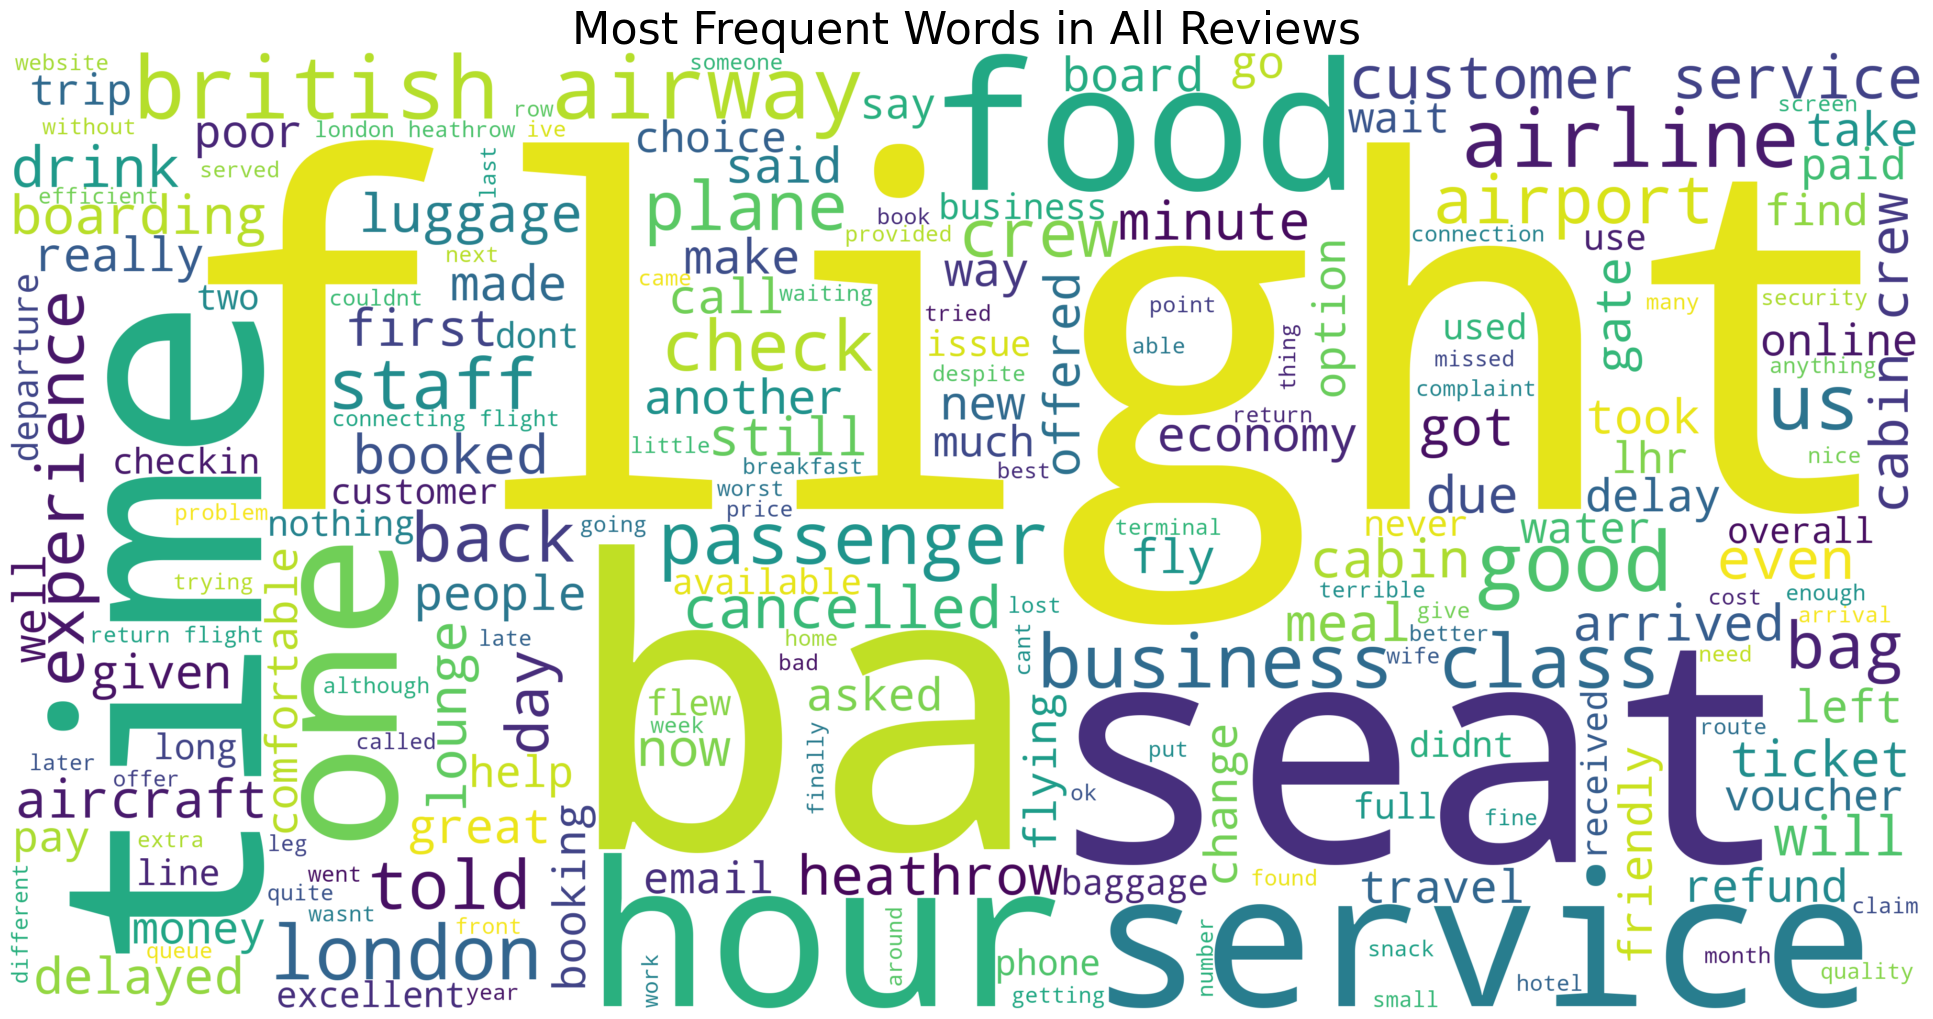

In [11]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

text = " ".join(review for review in df['reviews'].astype(str))
text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

wordcloud = WordCloud(width=4000, height=2000, background_color='white',
                      stopwords=stopwords, collocations=True).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in All Reviews", fontsize=32)
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file("wordcloud_high_res.png")

In [12]:
df_verified = df[df['trip_verification'] == 1]

In [13]:
df_verified.head()

,trip_verification,reviews
0,1,check in and security at t5 quick. both galler...
3,1,flight mainly let down by a disagreeable fligh...
4,1,another awful experience by british airways. t...
5,1,"the service was rude, full of attitude to me, ..."
6,1,this flight was a joke. there was four people ...


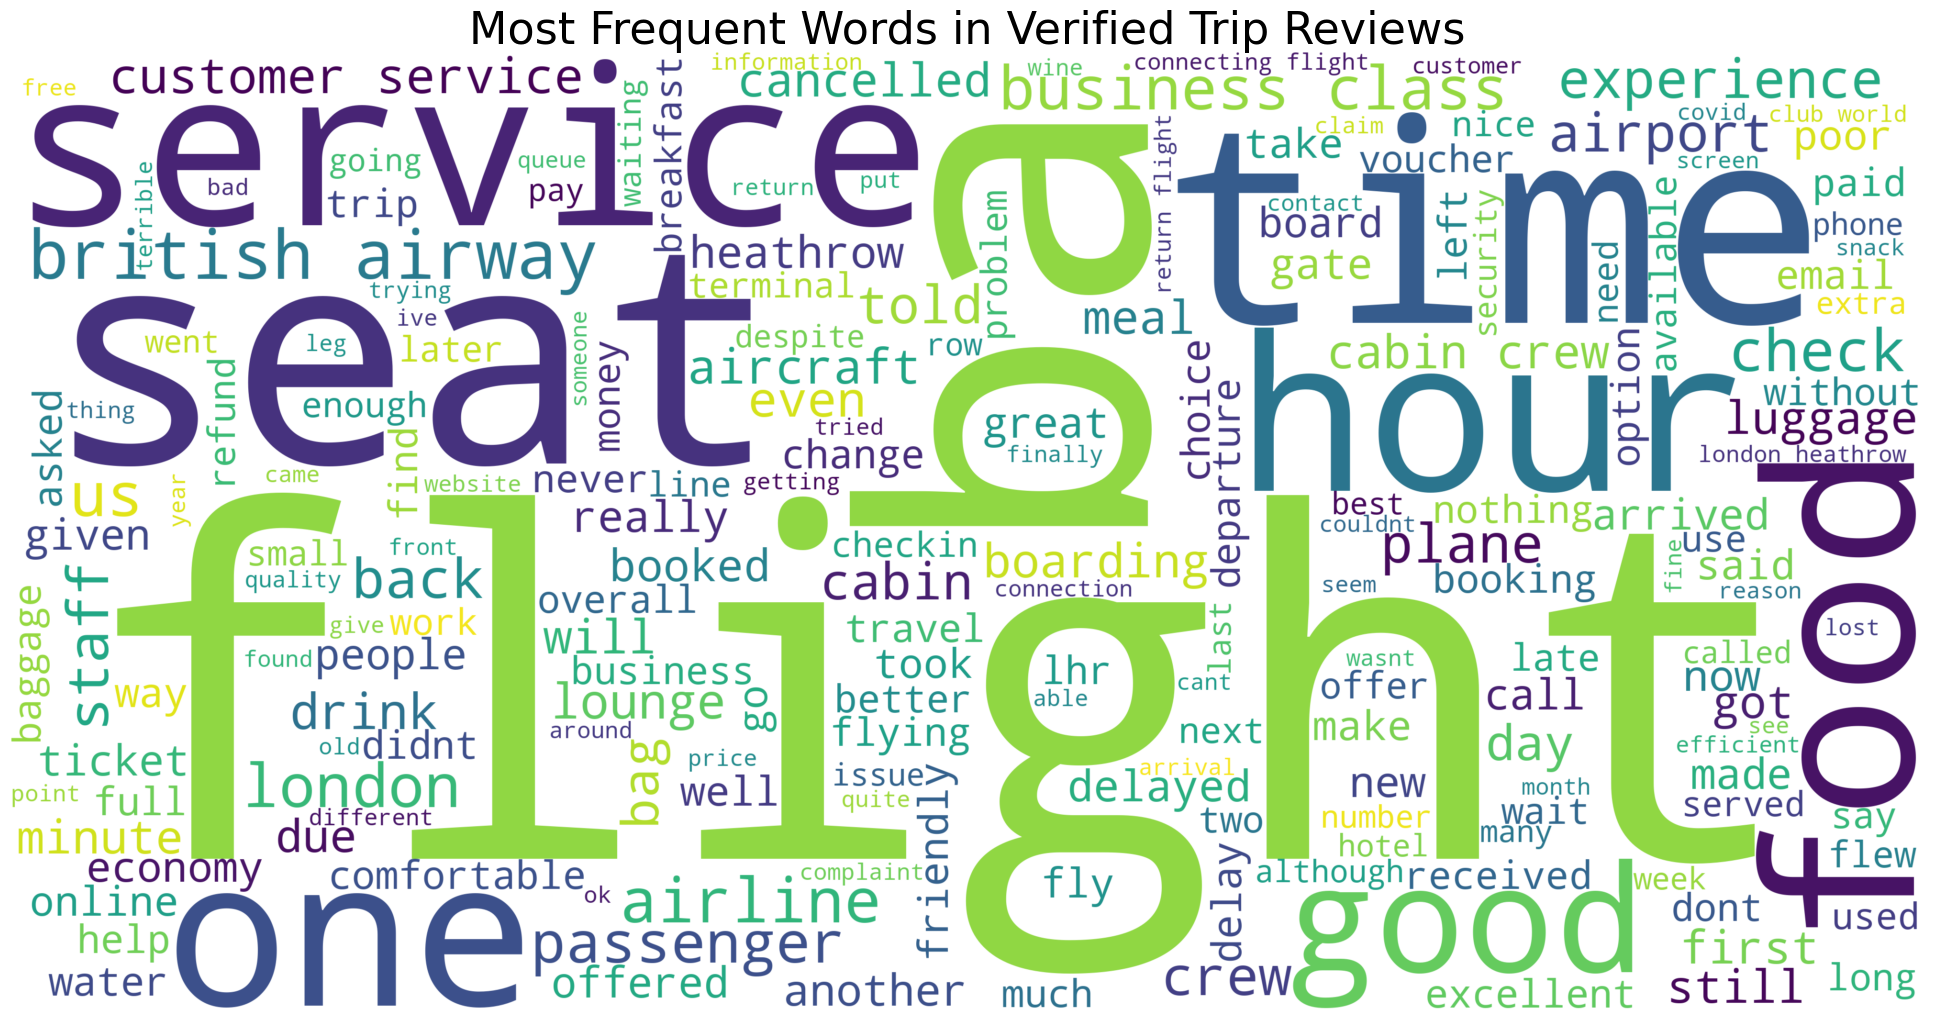

In [14]:
stopwords = set(STOPWORDS)

text = " ".join(review for review in df_verified['reviews'].astype(str))
text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

wordcloud = WordCloud(width=4000, height=2000, background_color='white',
                      stopwords=stopwords, collocations=True).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Verified Trip Reviews", fontsize=32)
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file("wordcloud_verified_high_res.png")

In [15]:
df_not_verified = df[df['trip_verification'] == 0]

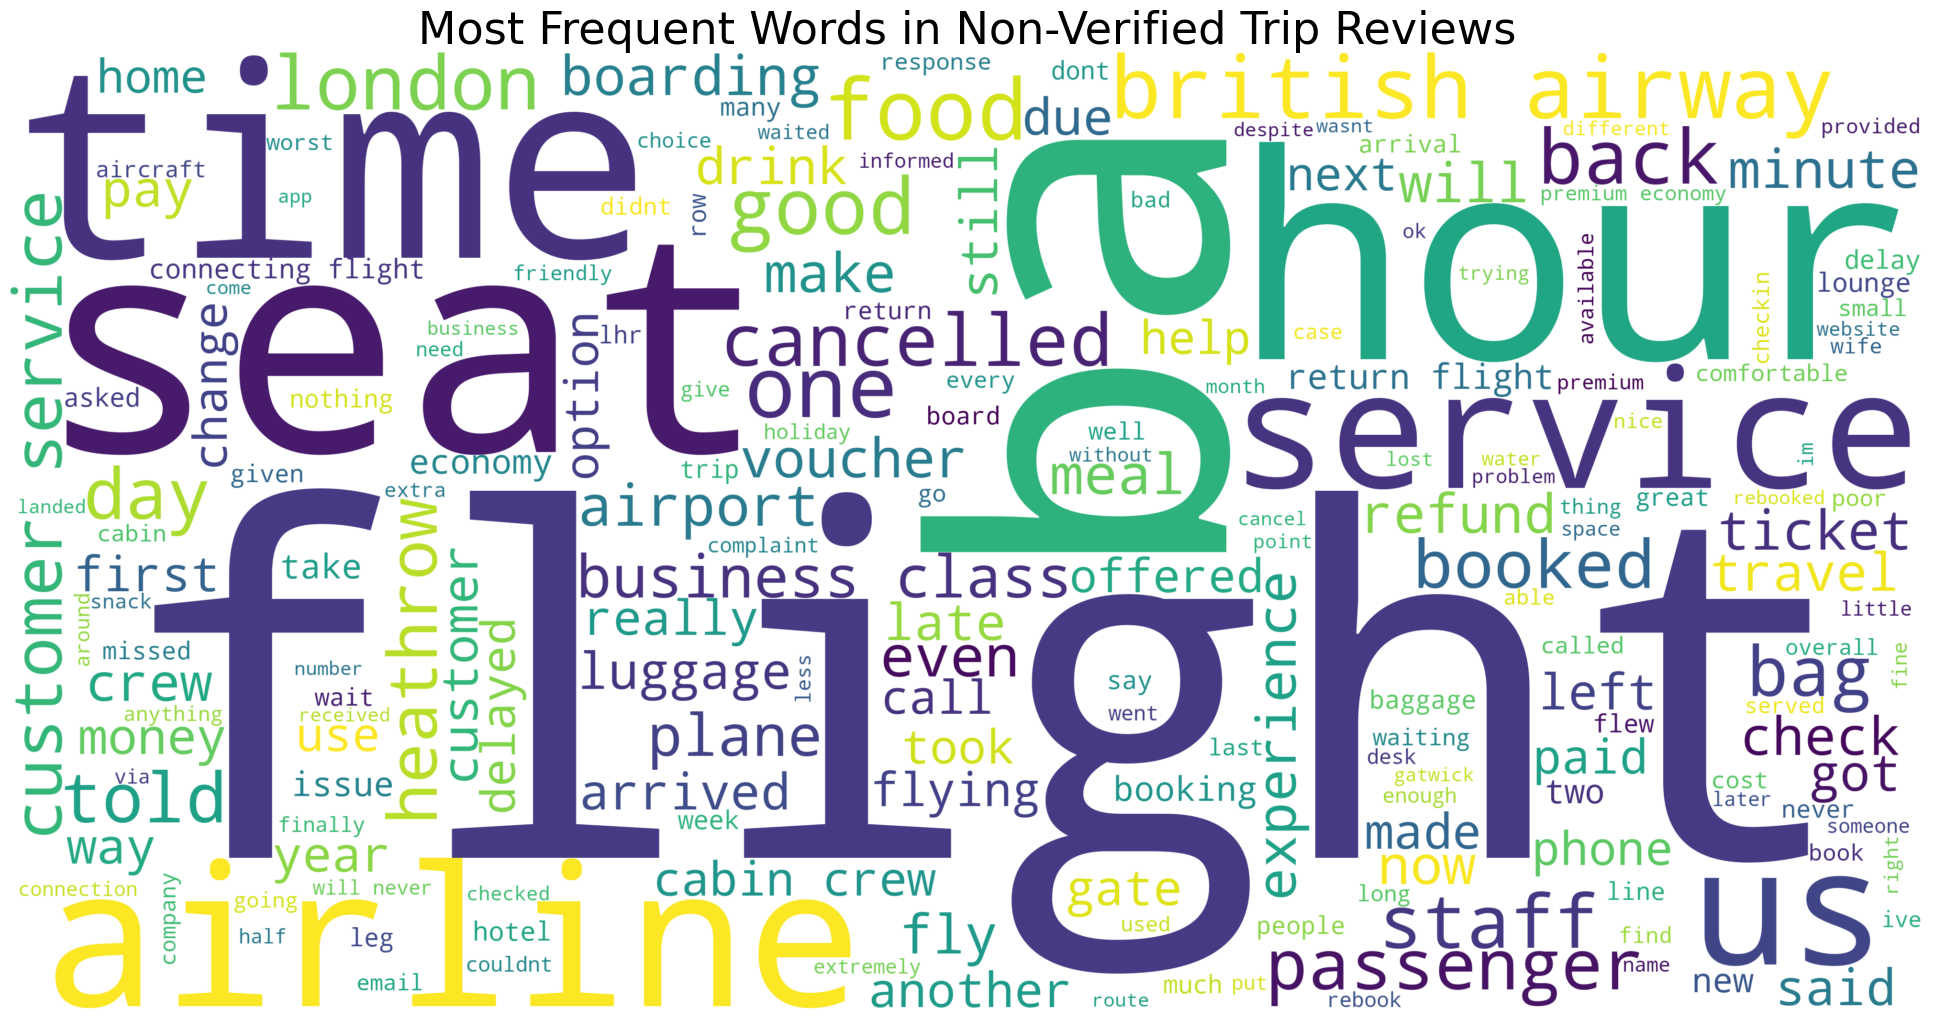

In [20]:
stopwords = set(STOPWORDS)

text = " ".join(review for review in df_not_verified['reviews'].astype(str))

text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

wordcloud = WordCloud(width=4000, height=2000, background_color='white',
                      stopwords=stopwords, collocations=True).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Non-Verified Trip Reviews", fontsize=32)
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file("wordcloud_non_verified_high_res.png")

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['reviews'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(label_sentiment)

print("Sentiment analysis applied successfully.")


Sentiment analysis applied successfully.


In [18]:
df['trip_verification'].value_counts()  

df.groupby('trip_verification')['sentiment'].value_counts(normalize=True)

trip_verification  sentiment
0                  negative     0.542636
                   positive     0.453488
                   neutral      0.003876
1                  negative     0.510782
                   positive     0.467655
                   neutral      0.021563
Name: proportion, dtype: float64

In [ ]:
import nltk
nltk.data.path.append("/Users/nurbekkhujaev/nltk_data")

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r"[^a-z\s]", "", text) 
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens] 
    return tokens

df['tokens'] = df['reviews'].apply(preprocess_text)

df[['reviews', 'tokens']].head()

In [24]:
from gensim import corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(df['tokens'])

corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5, 
                     random_state=42,
                     passes=10,
                     per_word_topics=True)

for i, topic in lda_model.print_topics(num_words=10):
    print(f"Topic #{i}: {topic}")

Topic #0: 0.022*"flight" + 0.017*"ba" + 0.013*"seat" + 0.009*"british" + 0.009*"service" + 0.009*"airway" + 0.009*"hour" + 0.008*"business" + 0.008*"class" + 0.007*"airline"
Topic #1: 0.035*"flight" + 0.021*"ba" + 0.011*"u" + 0.009*"seat" + 0.009*"hour" + 0.008*"time" + 0.006*"staff" + 0.006*"get" + 0.006*"told" + 0.006*"would"
Topic #2: 0.024*"flight" + 0.016*"crew" + 0.012*"ba" + 0.011*"service" + 0.011*"seat" + 0.010*"cabin" + 0.009*"time" + 0.009*"food" + 0.008*"good" + 0.007*"meal"
Topic #3: 0.033*"flight" + 0.016*"ba" + 0.011*"service" + 0.010*"customer" + 0.009*"day" + 0.009*"cancelled" + 0.008*"london" + 0.007*"call" + 0.007*"british" + 0.007*"refund"
Topic #4: 0.022*"flight" + 0.015*"ba" + 0.011*"good" + 0.011*"time" + 0.010*"seat" + 0.010*"food" + 0.010*"service" + 0.008*"hour" + 0.008*"cabin" + 0.008*"crew"


In [ ]:
import multiprocessing as mp

try:
    mp.set_start_method('spawn', force=True)
    print("Multiprocessing start method set to 'spawn'")
except ValueError:
    print("Multiprocessing start method already set")
    pass

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [26]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.save_html(vis, 'lda_vis.html')

In [27]:
from collections import Counter

dominant_topics = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in corpus]
topic_counts = Counter(dominant_topics)